In [1]:
perimetro <- function(a, b, n_iter = 10){
  h <- (a-b)^2/(a+b)^2
  combi <- function(x, size){
    factorial(size)/(factorial(x)*factorial(size-x))
  }
  binom <- c()
  for(i in (1:n_iter)-1){
    binom <- c(binom, combi(i,0.5)^2*h^i)
  }
  peri <- pi*(a+b)*sum(binom, na.rm = T)
  return(peri)
}

In [2]:
aproxi <- function(a,b){
  h <- (a-b)^2/(a+b)^2
  peri <- pi*(a+b)*(1+(3*h)/(10+sqrt(4-3*h)))
  return(peri)
}

In [15]:
perfeito <- function(a,b){
  require(pracma)
  e <- sqrt(1-(b+0i)^2/(a+0i)^2)
  funcao <- function(x,e){
    sqrt(1-e^2*sin(x)^2)
  }
  inte <- Re(integral(funcao,e = e,xmin = 0, xmax = pi/2))
  p <- 4*a*inte
  return(p)
}
perfeito <- Vectorize(perfeito)

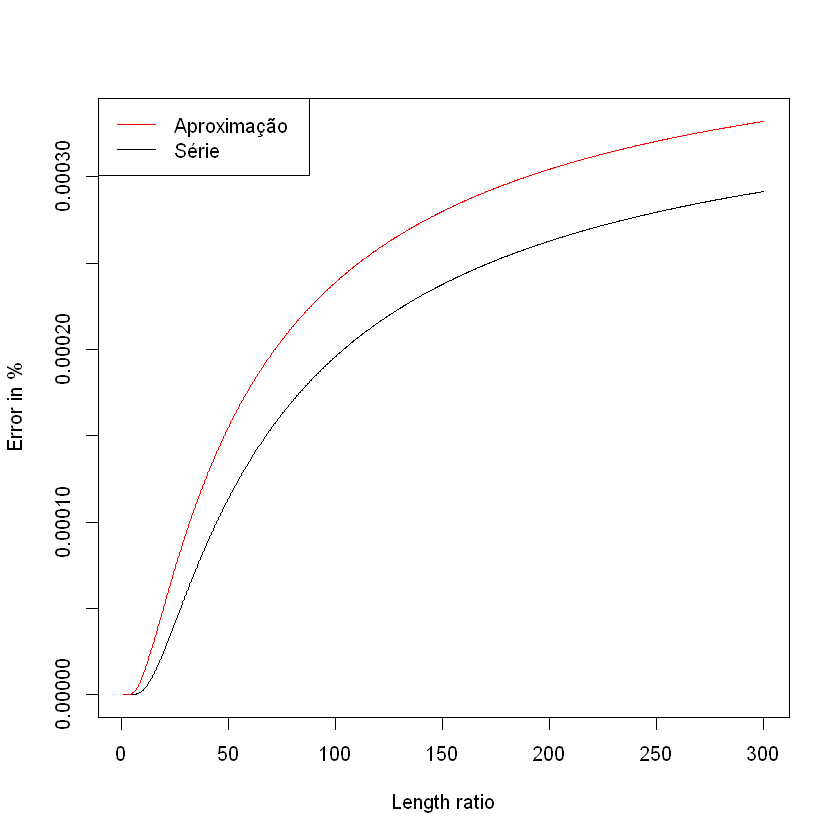

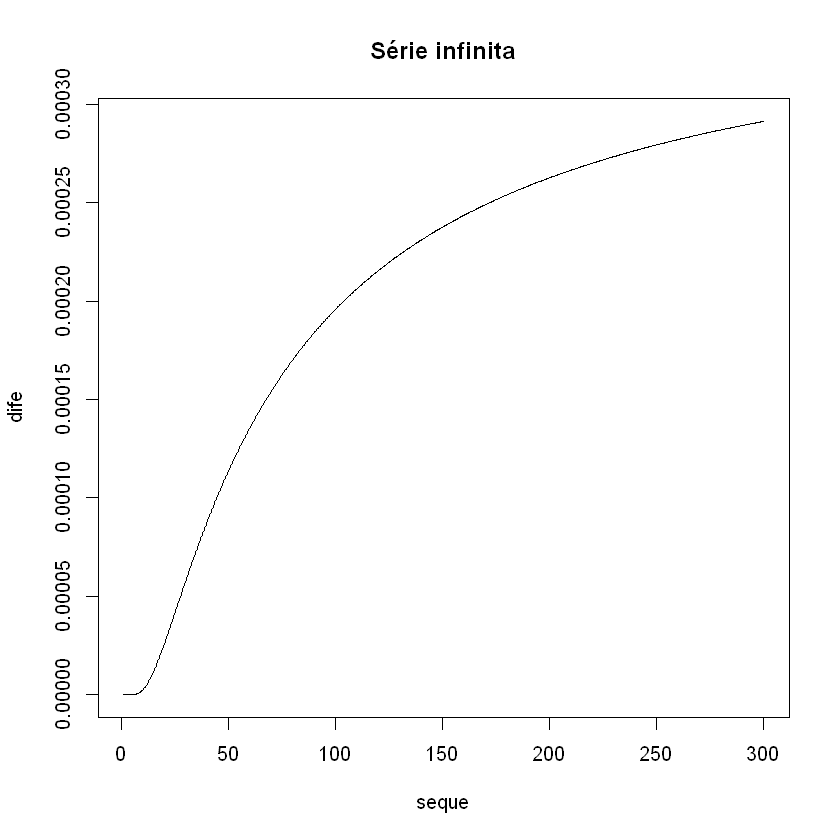

In [23]:
dife <- c()
dife1 <- c()
seque <- seq(1,300, l = 1000)
for(i in seque){
  per <- perimetro(i,1,10)
  peri <- perfeito(i,1)
  apr <- aproxi(i,1)
  dife <- c(dife,abs(per-peri)/peri)
  dife1 <- c(dife1, abs(apr-peri)/peri)
}
ylim <- c(min(dife,dife1), max(dife,dife1))
plot(seque, dife, type = "l", ylim = ylim, xlab = "Length ratio", ylab = "Error in %")
lines(seque, dife1, col = "red")
legend("topleft", legend = c("Aproximação","Série"), lty = 1, col = c("red","black"))
plot(seque, dife, type = "l", main = "Série infinita")